In [1]:
# %% --------------------------------------- Imports -------------------------------------------------------------------
import os
from time import time
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
path = ('/Users/carolinesklaver/Desktop/Capstone/NHANES/data/csv_data/')

import os
os.chdir(path)

SEED = 42

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [33]:
# data with squared continous columns
df_created_raw = pd.read_csv('df_feature_mlp_ext.csv')
df_created_raw.head()

,depressed,broken_hip,doc_osteoporosis,race_ethnicity,edu_level,#_ppl_household,age,gender,annual_HI,marital_status,...,serum_selenium_2,serum_zinc_2,serum_creatinine_2,lab_VitB12_2,bone_mineral_density_2,#_chronic_condition_2,hours_screen_2,combined_BP_2,people_per_rooms_2,diet_tot_VitB_2
0,0.0,0.0,0.0,4.0,4.0,4.0,44.0,0.0,11.000000,1.0,...,12581.180396,4991.680256,9.059151,198305.571052,0.445877,1.0,4.0,47524.0,0.250000,90249.172225
1,0.0,0.0,0.0,3.0,5.0,2.0,70.0,1.0,11.000000,1.0,...,17001.069514,6138.685741,9.059151,381841.413723,0.445877,4.0,4.0,39204.0,0.062500,663283.194084
2,0.0,0.0,0.0,3.0,3.0,2.0,73.0,1.0,7.566928,1.0,...,15055.057823,5831.331824,9.059151,132595.480327,0.445877,1.0,1.0,39204.0,0.081633,83303.236129
3,0.0,0.0,0.0,2.0,4.0,3.0,18.0,0.0,11.000000,5.0,...,15539.407404,6407.888282,9.059151,407710.932855,0.445877,4.0,64.0,30276.0,0.140625,95127.831184
4,0.0,0.0,0.0,3.0,4.0,3.0,19.0,1.0,11.000000,5.0,...,13672.703062,5408.978846,9.059151,261492.485488,0.445877,0.0,36.0,28900.0,0.183673,288015.762241


In [2]:
# data with just extended NHANES selected columns
df_raw = pd.read_csv('df_progressive_mlp_ext_ext.csv')
df_raw.head()

,depressed,broken_hip,doc_osteoporosis,race_ethnicity,edu_level,#_ppl_household,age,gender,annual_HI,marital_status,...,serum_selenium,serum_zinc,serum_creatinine,lab_VitB12,bone_mineral_density,difficult_hearing,difficult_seeing,difficult_walking,difficult_errands,doc_COPD
0,0.0,0.0,0.0,4.0,4.0,4.0,44.0,0.0,11.000000,1.0,...,112.165861,70.651824,3.009842,445.315137,0.66774,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,3.0,5.0,2.0,70.0,1.0,11.000000,1.0,...,130.388149,78.349765,3.009842,617.933179,0.66774,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,3.0,3.0,2.0,73.0,1.0,7.566928,1.0,...,122.699054,76.363158,3.009842,364.136623,0.66774,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,2.0,4.0,3.0,18.0,0.0,11.000000,5.0,...,124.657159,80.049287,3.009842,638.522461,0.66774,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,3.0,4.0,3.0,19.0,1.0,11.000000,5.0,...,116.930334,73.545760,3.009842,511.363360,0.66774,0.0,0.0,0.0,0.0,0.0


In [35]:
# created data without squared columns
df_created = df_created_raw[df_created_raw.columns.drop(list(df_created_raw.filter(regex='_2')))]

In [36]:
df_created.head()

,depressed,broken_hip,doc_osteoporosis,race_ethnicity,edu_level,#_ppl_household,age,gender,annual_HI,marital_status,...,hours_screen,limited,taste_smell,difficult_everyday,combined_BP,drugs_alcohol,people_per_rooms,sexuality,race_cat,diet_tot_VitB
0,0.0,0.0,0.0,4.0,4.0,4.0,44.0,0.0,11.000000,1.0,...,2.0,0.0,0.0,0.0,218.0,0.0,0.500000,0.0,3.0,300.415
1,0.0,0.0,0.0,3.0,5.0,2.0,70.0,1.0,11.000000,1.0,...,2.0,0.0,0.0,0.0,198.0,0.0,0.250000,0.0,2.0,814.422
2,0.0,0.0,0.0,3.0,3.0,2.0,73.0,1.0,7.566928,1.0,...,1.0,0.0,0.0,0.0,198.0,0.0,0.285714,0.0,2.0,288.623
3,0.0,0.0,0.0,2.0,4.0,3.0,18.0,0.0,11.000000,5.0,...,8.0,0.0,0.0,0.0,174.0,0.0,0.375000,0.0,1.0,308.428
4,0.0,0.0,0.0,3.0,4.0,3.0,19.0,1.0,11.000000,5.0,...,6.0,0.0,0.0,0.0,170.0,0.0,0.428571,0.0,2.0,536.671


In [3]:
# all columns created and newly selected from NHANES
pd.set_option('display.max_columns', None)
df_raw.columns.values

array(['depressed', 'broken_hip', 'doc_osteoporosis', 'race_ethnicity',
       'edu_level', '#_ppl_household', 'age', 'gender', 'annual_HI',
       'marital_status', 'caffeine', 'special_diet', 'protein', 'carb',
       'sugar', 'fiber', 'fat', 'diet_chol', 'VitB6', 'folate', 'VitB12',
       'magnesium', 'iron', 'zinc', 'selenium', 'water', 'doc_diabetes',
       'how_healthy_diet', 'used_CMH', 'gen_health_cond',
       'place_healthcare', 'healthcare_past_yr', 'health_insurance',
       '#_rooms', 'home_ownership', 'run_out_food', 'food_didnt_last',
       'afford_balanced_meals', 'adults_skip_meals', 'relied_cheap_food',
       'food_security_cat', 'food_stamps', 'WIC', 'doc_asthma',
       'doc_overweight', 'doc_arthritis', 'doc_CHF', 'doc_CHD',
       'doc_heart_attack', 'doc_stroke', 'doc_chronic_bronchitis',
       'doc_liver_condition', 'doc_thyroid_problem', 'doc_cancer',
       'anemia', 'doc_kidney', 'work_type', 'hrs_worked_week',
       'embarassed_mouth', 'lab_B12', 'vigo

In [4]:
def var_type(df):
    # input dataframe
    # return continuous, non-continous, and multi-categorical features
 
    cols = df.columns
    cont = []
    non_cont = []
    cat_encode = []
    
    # get continuous variables
    for c in cols:
        if df[c].nunique() > 6:
            cont.append(c)
    
    # non cont is the difference
    non_cont = np.setdiff1d(cols, [cont])
    
    # multi-cat are those greater than 2
    for n in non_cont:
        if df[n].nunique() > 2:
            cat_encode.append(n)
    
    return cont, non_cont, cat_encode

## Check distributions

In [9]:
cont, non_cont, cat_encode = var_type(df_created)

In [10]:
len(cat_encode)

19

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(18,12))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    #fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    

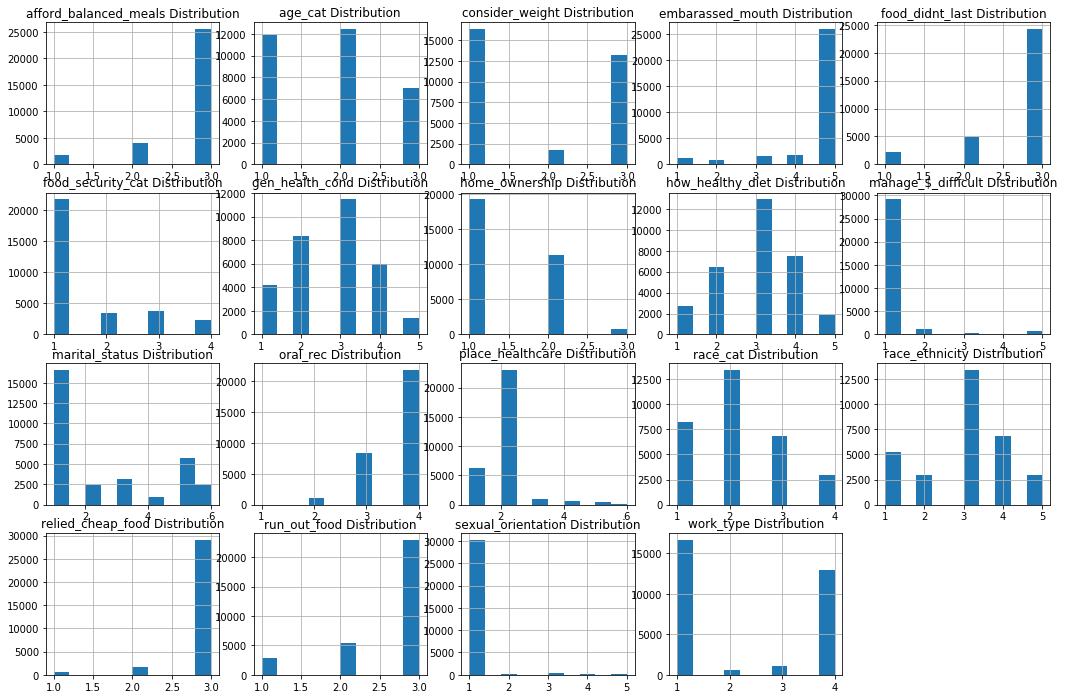

In [174]:
draw_histograms(df_created, cat_encode, 4, 5)

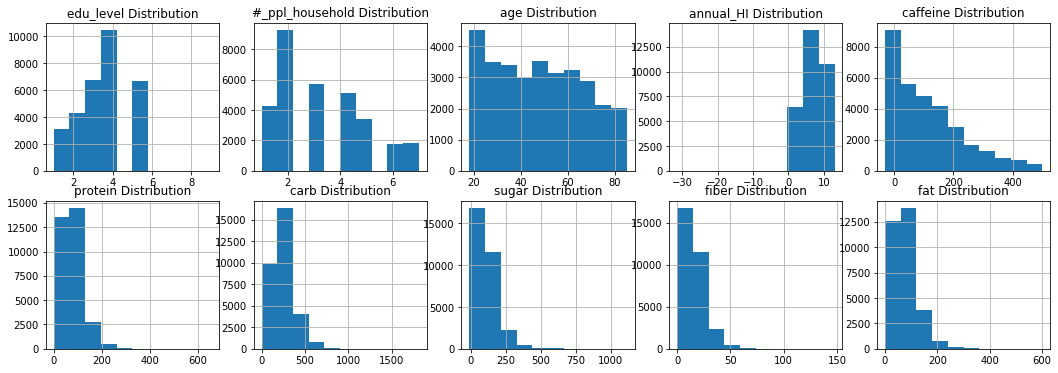

In [151]:
draw_histograms(df_created, cont[:10], 2, 5)

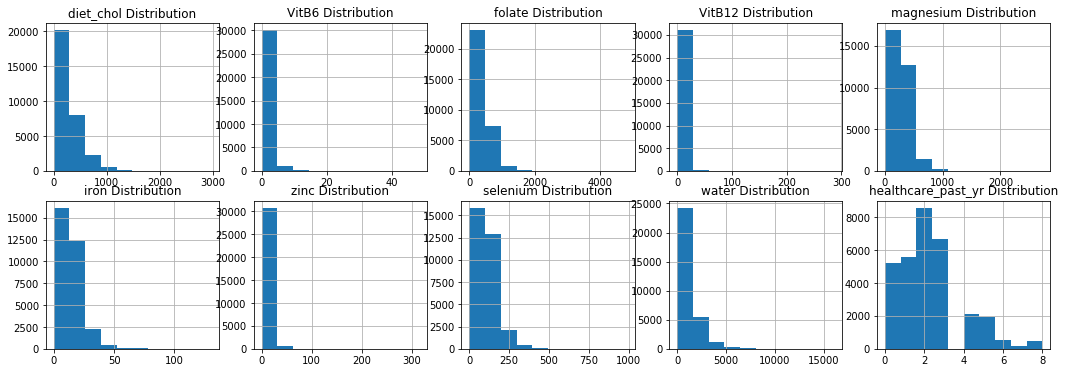

In [152]:
draw_histograms(df_created, cont[10:20], 2, 5)

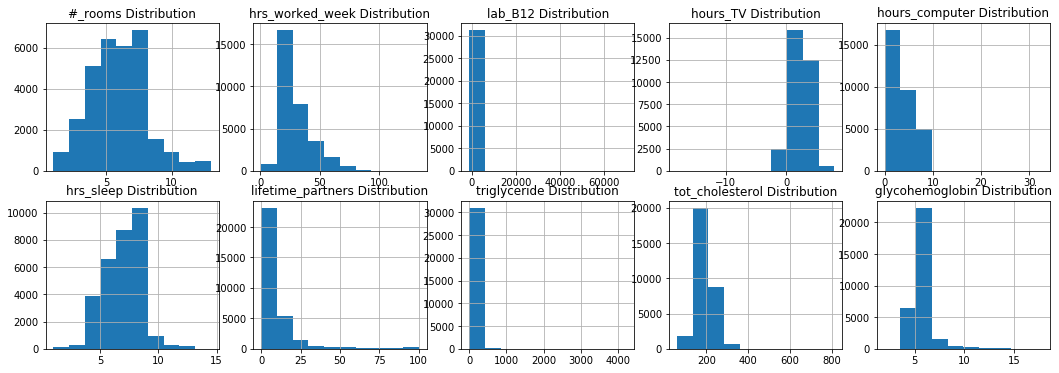

In [153]:
draw_histograms(df_created, cont[20:30], 2, 5)

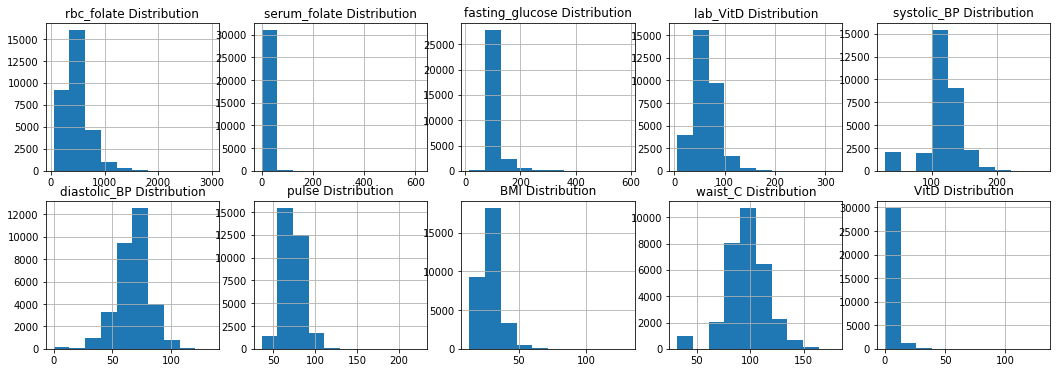

In [154]:
draw_histograms(df_created, cont[30:40], 2, 5)

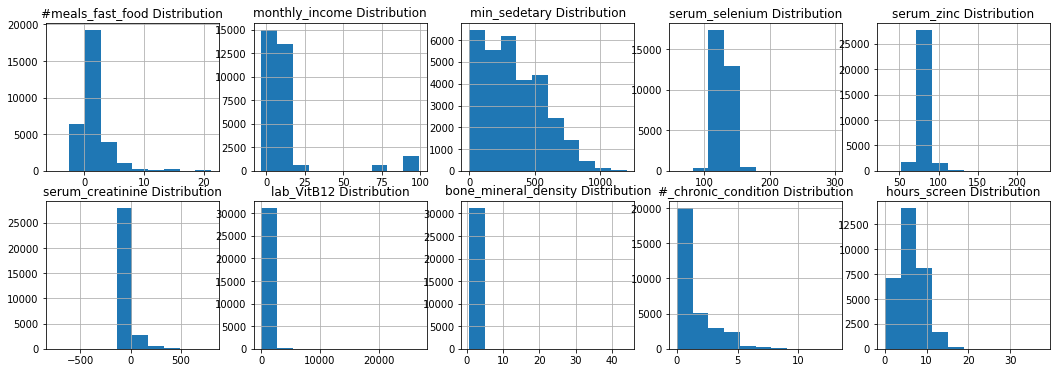

In [156]:
draw_histograms(df_created, cont[40:50], 2, 5)

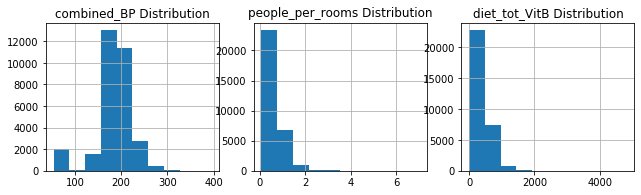

In [157]:
draw_histograms(df_created, cont[50:], 2, 5)

## Check correlations

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
#fig=plt.figure(figsize=(10, 8))

correlations = df_created.corr()

In [30]:
corr_matrix = df_created.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)

In [31]:
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [32]:
high_corr_var

# chose to drop highly correlated variables

[('race_ethnicity', 'race_cat'),
 ('age', 'age_cat'),
 ('protein', 'fat'),
 ('protein', 'magnesium'),
 ('protein', 'selenium'),
 ('carb', 'sugar'),
 ('fiber', 'magnesium'),
 ('folate', 'iron'),
 ('folate', 'diet_tot_VitB'),
 ('iron', 'diet_tot_VitB'),
 ('used_CMH', 'drugs_alcohol'),
 ('run_out_food', 'food_didnt_last'),
 ('run_out_food', 'food_security_cat'),
 ('run_out_food', 'not_enough_food'),
 ('food_didnt_last', 'afford_balanced_meals'),
 ('food_didnt_last', 'food_security_cat'),
 ('food_didnt_last', 'not_enough_food'),
 ('afford_balanced_meals', 'food_security_cat'),
 ('adults_skip_meals', 'food_security_cat'),
 ('food_security_cat', 'not_enough_food'),
 ('food_stamps', 'food_welfare'),
 ('work_type', 'hrs_worked_week'),
 ('moderate_activity', 'active'),
 ('hours_computer', 'hours_screen'),
 ('limit_work', 'limited'),
 ('sexual_orientation', 'sexuality'),
 ('alcoholic', 'drugs_alcohol'),
 ('glycohemoglobin', 'fasting_glucose'),
 ('systolic_BP', 'combined_BP'),
 ('diastolic_BP', '

In [16]:
df = df_created.copy()

In [40]:
subset_corr = ['depressed', 'broken_hip','edu_level', 'gender', 'marital_status', 'protein', 
       'sugar', 'fiber', 'fat', 'magnesium', 'iron', 'zinc', 'selenium', 'water', 
       'how_healthy_diet', 'gen_health_cond', 'healthcare_past_yr', 'health_insurance',
        'home_ownership', 'food_security_cat', 'work_type', 'hrs_worked_week',
       'embarassed_mouth', 'manage_$_difficult', 'doc_sleeping_disorder',
       'hrs_sleep', 'smoked_5days', 'sexual_orientation',  'consider_weight','triglyceride', 
               'tot_cholesterol', 'rbc_folate',
       'fasting_glucose', 'lab_VitD', 'pulse', 'BMI', 
       'monthly_income', 'oral_rec', 'difficult_remembering', 'prob_smell', 'prob_tatse',
       'persistent_cold',  'serum_selenium', 'serum_zinc', 'serum_creatinine', 'lab_VitB12',
        'doc_COPD', 'age_cat', 'not_enough_food', 'food_welfare', 'chronic_condition',
       '#_chronic_condition', 'active', 'hours_screen', 'limited',
       'taste_smell', 'difficult_everyday', 'combined_BP',
       'drugs_alcohol', 'people_per_rooms', 'sexuality', 'race_cat',
       'diet_tot_VitB']